## Python librarys



In [2]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## import Data set

In [3]:
import pandas as pd
from sqlalchemy import create_engine

username = "dm_team17"
password = "9o!etlre=itA"   # (avoid sharing this publicly in real life)
host = "18.136.157.135"     # server IP
port = 3306                 # default MySQL port (change if your admin gave a different one)
database = "project_shopping_trends"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")



In [4]:
pd.read_sql("Show Tables", engine)

,Tables_in_project_shopping_trends
0,shoping_table
1,shopping
2,shopping_table


In [5]:
df = pd.read_sql("SELECT * FROM `shopping_table` ", engine)
df.head(5)


,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Basic Checking


In [6]:
df.shape

(3900, 19)

In [7]:
df.describe()

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
print(df.shape)
print(df.dtypes)
print(df.isna().sum())
df.head()


(3900, 19)
Customer_ID                   int64
Age                           int64
Gender                       object
Item_Purchased               object
Category                     object
Purchase_Amount_USD           int64
Location                     object
Size                         object
Color                        object
Season                       object
Review_Rating               float64
Subscription_Status          object
Payment_Method               object
Shipping_Type                object
Discount_Applied             object
Promo_Code_Used              object
Previous_Purchases            int64
Preferred_Payment_Method     object
Frequency_of_Purchases       object
dtype: object
Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season               

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Binary mappings

In [11]:
cols = ['Discount_Applied', 'Promo_Code_Used', 'Subscription_Status' ]

for col in cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


## Define columns for clustering:

In [12]:
num_cols = ['Age', 'Purchase_Amount_USD', 'Previous_Purchases', 'Review_Rating']
bin_cols = ['Discount_Applied', 'Promo_Code_Used', 'Subscription_Status']
cat_cols = ['Gender', 'Category', 'Season', 'Location', 'Frequency_of_Purchases']

features = num_cols + bin_cols + cat_cols
X = df[features]



## Build preprocessing + K-Means pipeline

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

## Preprocess: impute + scale + encode

In [14]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore' ))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('bin', binary_transformer, bin_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
    # remainder = 'drop',
    # # sparse
)


## using Elboe Method 

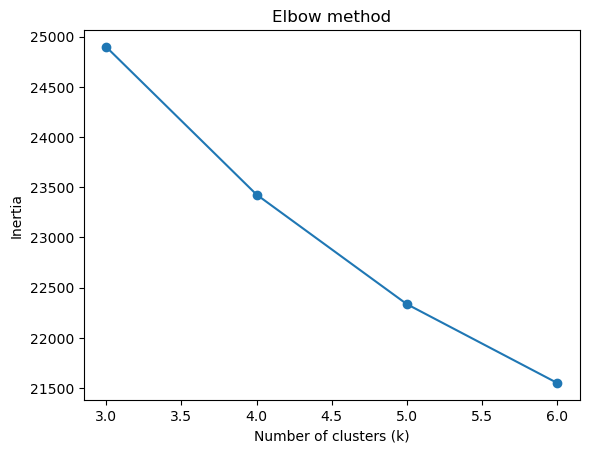

In [15]:
import matplotlib.pyplot as plt

inertias = []
K_range = range(3, 7)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    pipe = Pipeline(steps=[('prep', preprocess),
                           ('cluster', kmeans)])
    pipe.fit(X)
    inertias.append(pipe['cluster'].inertia_)

plt.plot(list(K_range), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()


## silhouette_score

In [17]:
import numpy as np
from sklearn.metrics import calinski_harabasz_score, silhouette_score

# convert sparse -> dense (careful with memory)
if hasattr(X_trans, "toarray"):
    X_dense = X_trans.toarray()
else:
    X_dense = np.asarray(X_trans)

sil_score = silhouette_score(X_dense, labels)   # you can use dense here too
ch_score  = calinski_harabasz_score(X_dense, labels)
inertia   = kmeans.inertia_

print("Silhouette:", sil_score)
print("Calinski-Harabasz:", ch_score)
print("Inertia:", inertia)


NameError: name 'X_trans' is not defined

## Total Data in Cluster 

In [18]:
k_final = 4   # pick based on elbow/silhouette
X_trans = preprocess.fit_transform(X)   # final transform
kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=10).fit(X_trans)
labels = kmeans.labels_

# attach to original df
df['Cluster'] = labels
df['Cluster'] = df['Cluster'].astype(int)
df['Cluster'].value_counts()


Cluster
3    984
1    980
2    968
0    968
Name: count, dtype: int64

## Traning And Testing 

In [19]:
# X_trans : your transformed matrix (may be sparse)
# labels  : cluster labels
# kmeans  : the fitted kmeans object (for inertia)

# 1) basics
print("X_trans type:", type(X_trans))
try:
    n_rows, n_cols = X_trans.shape
except Exception:
    n_rows, n_cols = X_trans.shape[0], X_trans.shape[1]
print("shape:", n_rows, "x", n_cols)

# If sparse, compute nnz and density; if dense, treat accordingly
is_sparse = hasattr(X_trans, "tocoo") and hasattr(X_trans, "tocsr")
if is_sparse:
    nnz = X_trans.nnz
    density = nnz / (n_rows * n_cols)
    print(f"sparse nnz={nnz}, density={density:.6f}")
else:
    density = 1.0
    print("dense matrix detected")

# 2) estimate memory for dense conversion (bytes)
bytes_per_elem = 8   # float64
dense_bytes = n_rows * n_cols * bytes_per_elem
dense_mb = dense_bytes / (1024**2)
print(f"Estimated memory if converted to dense: {dense_mb:.1f} MB")

# 3) decision threshold (you can lower/raise this)
DENSE_THRESHOLD_MB = 300  # convert to dense if estimated memory < this (adjustable)

# 4) compute metrics using appropriate path
try:
    if (not is_sparse) or (dense_mb <= DENSE_THRESHOLD_MB):
        # safe to convert to dense
        if is_sparse:
            X_dense = X_trans.toarray()
        else:
            X_dense = np.asarray(X_trans)
        sil_score = silhouette_score(X_dense, labels)
        ch_score  = calinski_harabasz_score(X_dense, labels)
        inertia   = kmeans.inertia_
        print("\nUsed: dense conversion")
    else:
        # Use TruncatedSVD to reduce dimensionality first (works with sparse)
        n_components = min(50, n_cols - 1, n_rows - 1)
        if n_components < 2:
            raise RuntimeError("Not enough components for TruncatedSVD. Try dense conversion or adjust threshold.")
        svd = TruncatedSVD(n_components=n_components, random_state=42)
        X_svd = svd.fit_transform(X_trans)   # works with sparse
        sil_score = silhouette_score(X_svd, labels)
        ch_score  = calinski_harabasz_score(X_svd, labels)
        inertia   = kmeans.inertia_
        print(f"\nUsed: TruncatedSVD -> n_components={n_components}")
except MemoryError:
    warnings.warn("MemoryError while trying dense conversion. Falling back to TruncatedSVD.")
    n_components = min(50, n_cols - 1, n_rows - 1)
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    X_svd = svd.fit_transform(X_trans)
    sil_score = silhouette_score(X_svd, labels)
    ch_score  = calinski_harabasz_score(X_svd, labels)
    inertia   = kmeans.inertia_
except Exception as e:
    raise

# 5) print results
print("\nResults:")
print("Silhouette:", round(sil_score, 4))
print("Calinski-Harabasz:", round(ch_score, 2))
print("Inertia:", inertia)


X_trans type: <class 'scipy.sparse._csr.csr_matrix'>
shape: 3900 x 69
sparse nnz=35383, density=0.131486
Estimated memory if converted to dense: 2.1 MB

Used: dense conversion

Results:
Silhouette: 0.0857
Calinski-Harabasz: 346.52
Inertia: 23427.534528171913


## Grouping cluster

In [20]:
agg_cols = {
    'Age':'mean',
    'Purchase_Amount_USD':'mean',
    'Previous_Purchases':'mean',
    'Review_Rating':'mean',
    'Discount_Applied':'mean',
    'Promo_Code_Used':'mean',
    'Subscription_Status':'mean'
}
# Keep only agg cols that exist
agg_cols = {k:v for k,v in agg_cols.items() if k in df.columns}

cluster_profile = df.groupby('Cluster').agg(agg_cols).round(2)
cluster_profile['count'] = df.groupby('Cluster').size()
cluster_profile = cluster_profile.sort_index()
cluster_profile


,Age,Purchase_Amount_USD,Previous_Purchases,Review_Rating,Discount_Applied,Promo_Code_Used,Subscription_Status,count
Cluster,,,,,,,,
0,56.30,81.67,26.88,3.98,0.41,0.41,0.27,968
1,31.18,55.08,23.88,4.41,0.42,0.42,0.25,980
2,32.78,65.42,23.43,3.07,0.43,0.43,0.27,968
3,55.97,37.31,27.20,3.54,0.46,0.46,0.29,984


## Measure Clustering Accuracy

In [21]:

# K_range should be defined by you, e.g. K_range = range(2, 11)
# X_trans is your transformed matrix (may be sparse)
# threshold (MB) for converting sparse -> dense
DENSE_THRESHOLD_MB = 300

# 1) detect sparsity and size
is_sparse = sp.issparse(X_trans)
n_rows, n_cols = X_trans.shape
print("X_trans shape:", n_rows, "x", n_cols, "  sparse:", is_sparse)

# 2) estimate dense memory
dense_bytes = n_rows * n_cols * 8
dense_mb = dense_bytes / (1024**2)
print(f"Estimated dense memory: {dense_mb:.1f} MB")

# 3) decide path: dense conversion or TruncatedSVD fallback
use_dense = (not is_sparse) or (dense_mb <= DENSE_THRESHOLD_MB)

if use_dense:
    print("Using dense representation for metrics.")
    if is_sparse:
        X_used = X_trans.toarray()
    else:
        X_used = np.asarray(X_trans)
    # no dimensionality reduction
    svd_used = False
else:
    # choose n_components for SVD (safe defaults)
    n_components = min(50, n_cols - 1, n_rows - 1)
    if n_components < 2:
        raise RuntimeError("Not enough components for TruncatedSVD. Consider lowering threshold or converting to dense.")
    print(f"Using TruncatedSVD to reduce to n_components={n_components} (memory-safe).")
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    X_used = svd.fit_transform(X_trans)   # works with sparse input
    svd_used = True

# 4) Loop over K_range and compute metrics
print("\nResults:")
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_used)
    sil = silhouette_score(X_used, labels)
    ch = calinski_harabasz_score(X_used, labels)
    inertia = km.inertia_
    method = "SVD" if svd_used else "Dense"
    print(f"k={k:2d}  silhouette={sil:.4f}  calinski_harabasz={ch:.2f}  inertia={inertia:.2f}  ({method})")


NameError: name 'sp' is not defined

In [22]:
# sil_score = silhouette_score(X_trans, labels)
# ch_score = calinski_harabasz_score(X_trans, labels)
# inertia = kmeans.inertia_
# print("Silhouette:", sil_score)
# print("Calinski-Harabasz:", ch_score)
# print("Inertia:", inertia)


import numpy as np
from sklearn.metrics import calinski_harabasz_score, silhouette_score

# convert sparse -> dense (careful with memory)
if hasattr(X_trans, "toarray"):
    X_dense = X_trans.toarray()
else:
    X_dense = np.asarray(X_trans)

sil_score = silhouette_score(X_dense, labels)   # you can use dense here too
ch_score  = calinski_harabasz_score(X_dense, labels)
inertia   = kmeans.inertia_

print("Silhouette:", sil_score)
print("Calinski-Harabasz:", ch_score)
print("Inertia:", inertia)



Silhouette: 0.0856901146828964
Calinski-Harabasz: 346.51616376648235
Inertia: 23427.534528171913


In [23]:
for col in ['Category','Season','Location','Gender','Payment_Method']:
    if col in df.columns:
        print("\n", col)
        print(df.groupby('Cluster')[col].agg(lambda x: x.value_counts().index[0]))



 Category
Cluster
0    Clothing
1    Clothing
2    Clothing
3    Clothing
Name: Category, dtype: object

 Season
Cluster
0      Fall
1    Spring
2    Winter
3    Spring
Name: Season, dtype: object

 Location
Cluster
0       Montana
1    California
2      Delaware
3      Maryland
Name: Location, dtype: object

 Gender
Cluster
0    Male
1    Male
2    Male
3    Male
Name: Gender, dtype: object

 Payment_Method
Cluster
0         Venmo
1        PayPal
2    Debit Card
3          Cash
Name: Payment_Method, dtype: object


In [24]:
if 'Payment_Method' in df.columns:
    df['Is_Card'] = df['Payment_Method'].isin(['Credit Card','Debit Card']).astype(int)
    card_summary = df.groupby('Cluster').agg(
        total_spend=('Purchase_Amount_USD','sum'),
        card_spend=('Purchase_Amount_USD', lambda x: x[df['Is_Card']==1].sum() if True else np.nan),
        card_pct = ('Is_Card','mean'),
        txn_count=('Purchase_Amount_USD','count'),
        avg_ticket=('Purchase_Amount_USD','mean')
    )
    # card_spend lambda above is tricky because of index alignment; simpler:
    card_summary = pd.DataFrame()
    card_summary['total_spend'] = df.groupby('Cluster')['Purchase_Amount_USD'].sum()
    card_summary['card_spend'] = df[df['Is_Card']==1].groupby('Cluster')['Purchase_Amount_USD'].sum().fillna(0)
    card_summary['card_pct'] = df.groupby('Cluster')['Is_Card'].mean()
    card_summary['txn_count'] = df.groupby('Cluster')['Purchase_Amount_USD'].count()
    card_summary['avg_ticket'] = df.groupby('Cluster')['Purchase_Amount_USD'].mean().round(2)
    card_summary


In [25]:
for c in sorted(df['Cluster'].unique()):
    print("Cluster", c)
    display(cluster_profile.loc[c:c])
    print("Top category:", df[df['Cluster']==c]['Category'].mode().iloc[0] if 'Category' in df.columns else 'N/A')
    print("Top season:", df[df['Cluster']==c]['Season'].mode().iloc[0] if 'Season' in df.columns else 'N/A')
    print("Card share:", round(df[df['Cluster']==c]['Is_Card'].mean()*100,1) if 'Is_Card' in df.columns else 'N/A', "%")
    print("-"*40)


Cluster 0


,Age,Purchase_Amount_USD,Previous_Purchases,Review_Rating,Discount_Applied,Promo_Code_Used,Subscription_Status,count
Cluster,,,,,,,,
0,56.3,81.67,26.88,3.98,0.41,0.41,0.27,968


Top category: Clothing
Top season: Fall
Card share: 32.9 %
----------------------------------------
Cluster 1


,Age,Purchase_Amount_USD,Previous_Purchases,Review_Rating,Discount_Applied,Promo_Code_Used,Subscription_Status,count
Cluster,,,,,,,,
1,31.18,55.08,23.88,4.41,0.42,0.42,0.25,980


Top category: Clothing
Top season: Spring
Card share: 33.0 %
----------------------------------------
Cluster 2


,Age,Purchase_Amount_USD,Previous_Purchases,Review_Rating,Discount_Applied,Promo_Code_Used,Subscription_Status,count
Cluster,,,,,,,,
2,32.78,65.42,23.43,3.07,0.43,0.43,0.27,968


Top category: Clothing
Top season: Winter
Card share: 38.0 %
----------------------------------------
Cluster 3


,Age,Purchase_Amount_USD,Previous_Purchases,Review_Rating,Discount_Applied,Promo_Code_Used,Subscription_Status,count
Cluster,,,,,,,,
3,55.97,37.31,27.2,3.54,0.46,0.46,0.29,984


Top category: Clothing
Top season: Spring
Card share: 32.5 %
----------------------------------------


In [26]:
df['Cluster'] = labels  # or labels_extra / labels_pca depending on which you used
print(df['Cluster'].value_counts().sort_index())

cluster_profile = df.groupby('Cluster').agg({
    'Age':'mean',
    'Purchase_Amount_USD':'mean',
    'Previous_Purchases':'mean',
    'Review_Rating':'mean',
    'Discount_Applied':'mean',
    'Promo_Code_Used':'mean',
    'Subscription_Status':'mean'
}).round(2)

print(cluster_profile)


Cluster
0    968
1    980
2    968
3    984
Name: count, dtype: int64
           Age  Purchase_Amount_USD  Previous_Purchases  Review_Rating  \
Cluster                                                                  
0        56.30                81.67               26.88           3.98   
1        31.18                55.08               23.88           4.41   
2        32.78                65.42               23.43           3.07   
3        55.97                37.31               27.20           3.54   

         Discount_Applied  Promo_Code_Used  Subscription_Status  
Cluster                                                          
0                    0.41             0.41                 0.27  
1                    0.42             0.42                 0.25  
2                    0.43             0.43                 0.27  
3                    0.46             0.46                 0.29  


cluster_profile

## Get dominant Category / Season / Location / Gender in each cluster

In [27]:
def mode(series):
    return series.value_counts().idxmax()

cluster_cats = df.groupby('Cluster').agg({
    'Category': mode,
    'Season': mode,
    'Location': mode,
    'Gender': mode,
    'Frequency_of_Purchases': mode
})

print(cluster_cats)


         Category  Season    Location Gender Frequency_of_Purchases
Cluster                                                            
0        Clothing    Fall     Montana   Male               Annually
1        Clothing  Spring  California   Male         Every 3 Months
2        Clothing  Winter    Delaware   Male         Every 3 Months
3        Clothing  Spring    Maryland   Male               Annually


# #Card usage by clusters

In [28]:
df['is_card'] = df['Payment_Method'].isin(['Credit Card', 'Debit Card']).astype(int)
card_share = df.groupby('Cluster')['is_card'].mean().round(2)
print(card_share)


Cluster
0    0.33
1    0.33
2    0.38
3    0.33
Name: is_card, dtype: float64


In [29]:
# Cell 14 - export CSV for Power BI
df.to_csv(r"C:\Users\RAJESH\OneDrive\Desktop\Raw Data1.csv", index=False)
print("Exported to /mnt/data/shopping_clustered.csv")


Exported to /mnt/data/shopping_clustered.csv
